# Pokemons and their stats
## Описание датасета
### a)
Этот набор данных включает 1045 покемонов, включая их количество, имена и основные характеристики: HP, атака, защита, специальная атака, специальная защита и скорость. Это необработанные атрибуты, которые используются для расчета ущерба, который нанесет атака в играх. Характер данных - иммитационный.

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### b)
Датасет включает в себя следующие атрибуты:

In [46]:
df = pd.read_csv("F:\Учеба\ML\pokemon.csv")
df.dtypes

Name          object
Total          int64
HP             int64
Attack         int64
Defence        int64
Sp_attack      int64
Sp_defence     int64
Speed          int64
dtype: object

Для удобства уберем столбец Name

In [47]:
del df['Name']
df.head()

,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,309,39,52,43,60,50,65


В итоге продолжим работать с следующими атрибутами:
№: ID каждого покемона.
Total: сумма всех характеристик, общее руководство по тому, насколько силен покемон. 
HP: очки жизни или здоровье, определяет, какой урон может выдержать покемон, прежде чем потерять сознание. 
Attack: базовый модификатор для обычных атак. 
Defence: базовое сопротивление урону от обычных атак.
SP Atk: специальная атака.
SP Def: базовое сопротивление урону от специальных атак. 
Speed: определяет, какой покемон атакует первым в каждом раунде.
Данные для этой таблицы были получены с нескольких разных сайтов:
https://pokemondb.net/pokedex/all
https://www.serebii.net/pokedex-dp/stat/all.shtml

## Анализ датасета

### a) Среднее значение и ско

In [48]:
df_mean = pd.DataFrame(index = ['Ср. знач', 'СКО'], columns = ['Total', 'HP', 'Attack', 'Defence', 'Sp_attack', 'Sp_defence', 'Speed'])
for column in df.columns:
    df_mean[column]['Ср. знач'] = df[column].mean()
    df_mean[column]['СКО'] = df[column].std()
df_mean

,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
Ср. знач,439.314833,70.067943,80.466986,74.661244,73.02201,72.288995,68.807656
СКО,121.970701,26.671411,32.413665,31.237903,32.724797,28.074148,30.210094


### b) Построить гистограмму распределения значений, определить есть ли выбросы

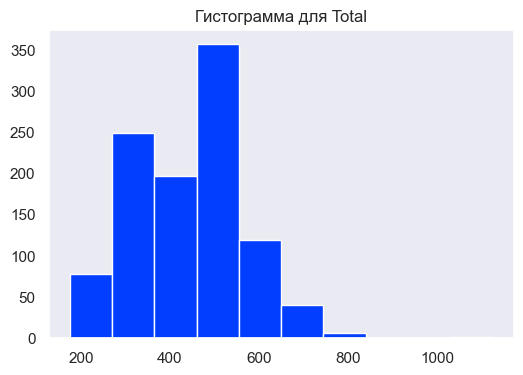

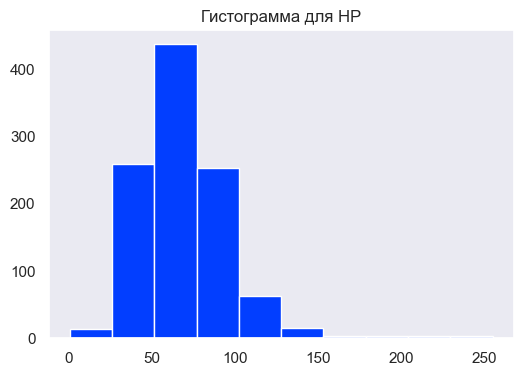

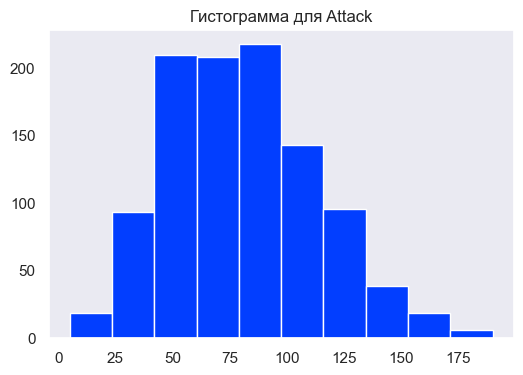

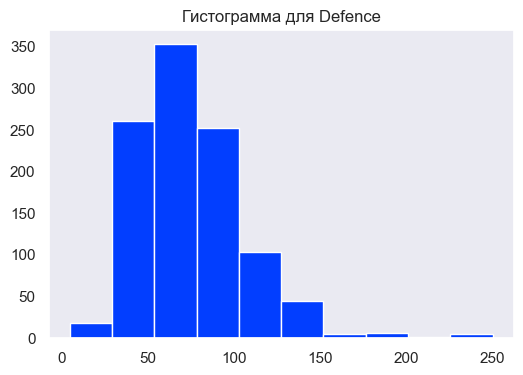

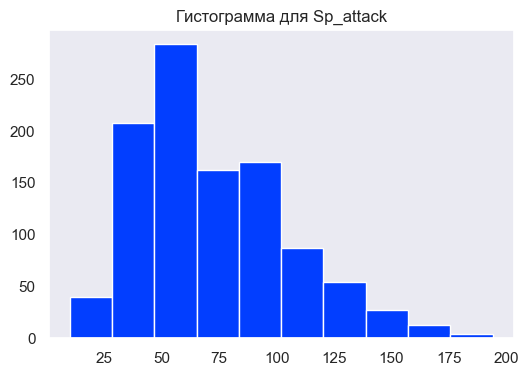

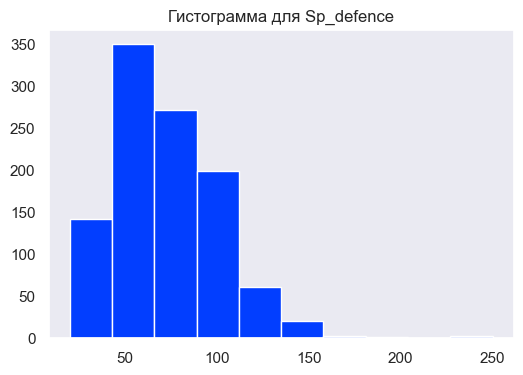

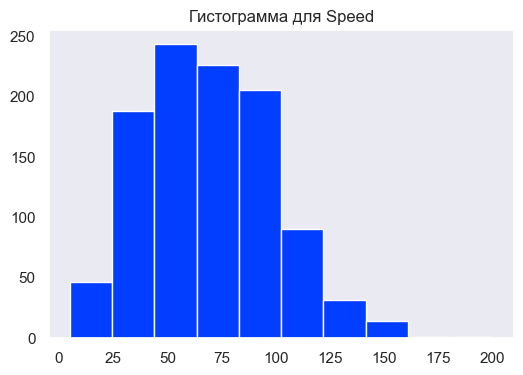

In [49]:
%matplotlib inline
for column in df.columns:
    plt.figure(figsize=(6, 4))
    plt.subplot()
    plt.hist(df[column])
    plt.title(f"Гистограмма для {column}")
    plt.show()

In [50]:
for column in df.columns:
    lower_bound = df[column].mean() - 3 * df[column].std()
    upper_bound = df[column].mean() + 3 * df[column].std()
    for i in df[column]:
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        if (i > upper_bound):
            print("Выброс :", i)
        if (i < lower_bound):
            print("Выброс :", i)
    print(f"Количество выбросов в {column} : {str(len(outliers))}")

Выброс : 1125
Количество выбросов в Total : 1
Выброс : 250
Выброс : 160
Выброс : 190
Выброс : 255
Выброс : 170
Выброс : 165
Выброс : 216
Выброс : 223
Выброс : 255
Выброс : 200
Количество выбросов в HP : 10
Выброс : 190
Выброс : 185
Выброс : 180
Выброс : 180
Выброс : 180
Выброс : 181
Количество выбросов в Attack : 6
Выброс : 180
Выброс : 180
Выброс : 200
Выброс : 230
Выброс : 230
Выброс : 180
Выброс : 230
Выброс : 200
Выброс : 184
Выброс : 211
Выброс : 250
Количество выбросов в Defence : 11
Выброс : 175
Выброс : 194
Выброс : 180
Выброс : 180
Выброс : 180
Выброс : 173
Количество выбросов в Sp_attack : 6
Выброс : 230
Выброс : 200
Выброс : 160
Выброс : 160
Выброс : 250
Количество выбросов в Sp_defence : 5
Выброс : 160
Выброс : 180
Выброс : 200
Количество выбросов в Speed : 3


### c) Проверка на наличие пропущенных значений

In [51]:
for column in df.columns:
    missing = df[column].isna().sum()
    print(f"Пропущенных значений в {column} : {missing}")

Пропущенных значений в Total : 0
Пропущенных значений в HP : 0
Пропущенных значений в Attack : 0
Пропущенных значений в Defence : 0
Пропущенных значений в Sp_attack : 0
Пропущенных значений в Sp_defence : 0
Пропущенных значений в Speed : 0


### d) Вариант обработки пропущенных значений
Отсутствующие данные объектов можно заменить на конкретные числовые значения, для этого можно использовать метод fillna().
Этот метод не изменяет текущую структуру, он возвращает структуру DataFrame, созданную на базе существующей, с заменой NaN значений на те, что переданы в метод в качестве аргумента. Данные можно заполнить средним значением по столбцу.
В зависимости от задачи используется тот или иной метод заполнения отсутствующих элементов, это может быть нулевое значение, математическое ожидание, медиана и т.п. Для замены NaN элементов на конкретные значения, можно использовать интерполяцию, которая реализована в методе interpolate(), алгоритм интерполяции задается через аргументы метода.

## Определение корреляции между параметрами

### Матрица корреляции

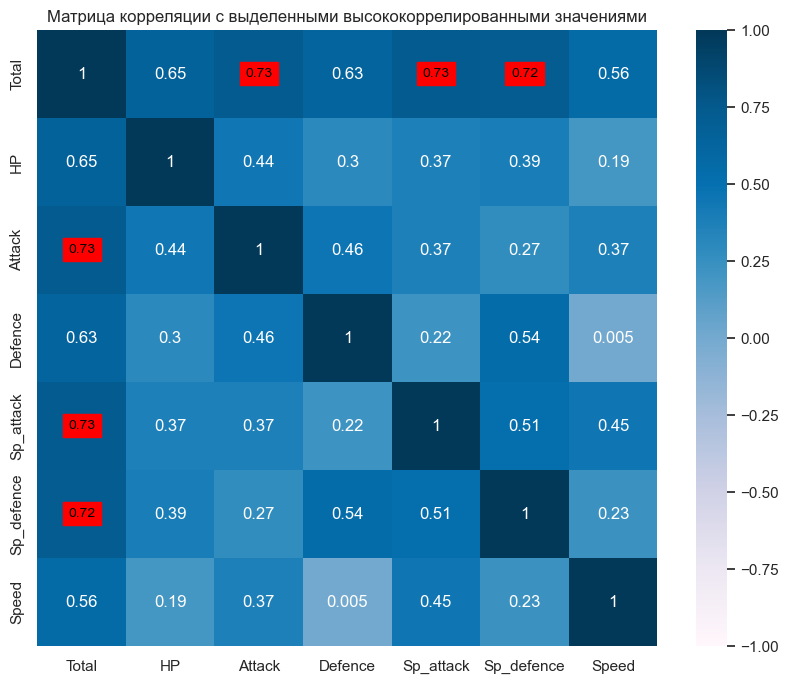

In [52]:
corr = df.corr().round(3)

plt.figure(figsize=(10, 8))
plt.title("Матрица корреляции с выделенными высококоррелированными значениями")
sns.heatmap(corr, annot=True, cmap="PuBu", vmin=-1, vmax=1)

threshold = 0.7

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        if i != j and (corr.iloc[i, j] >= threshold or corr.iloc[i, j] <= -threshold):
            plt.text(i + 0.5, j + 0.5, f"{corr.iloc[i, j]:.2f}", ha="center", va="center", fontsize=10, color="black", backgroundcolor="red")
plt.show()

### a)
Представлена матрица корреляции "corr", где каждый ее элемент представляет коэффициент корреляции Пирсона между соответствующими парами атрибутов. Он принимает значение от -1 до 1. Чем ближе значение к 1, тем выше положительная корреляция между показателями. Если оно, наоборот, ближе к -1 — корреляция отрицательная. А близкое к 0 значение, включая сам ноль, говорит, что корреляции нет.
Корреляция может быть:
положительной — когда один показатель растет, другой тоже растет;
отрицательной — когда одна переменная растет, другая уменьшается;
нейтральной — изменения не связаны друг с другом.
### Характер корреляции
Total и Attack - это положительная корреляция, тогда можно сделать вывод, что при увеличении базовой атаки будет увеличиваться основные характеристики покемона.
### b) 
В моем случае все атрибуты имеют корреляцию. Самая слабая из них - Defence и Speed.

### c) Матрица графиков рассеивания

F:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


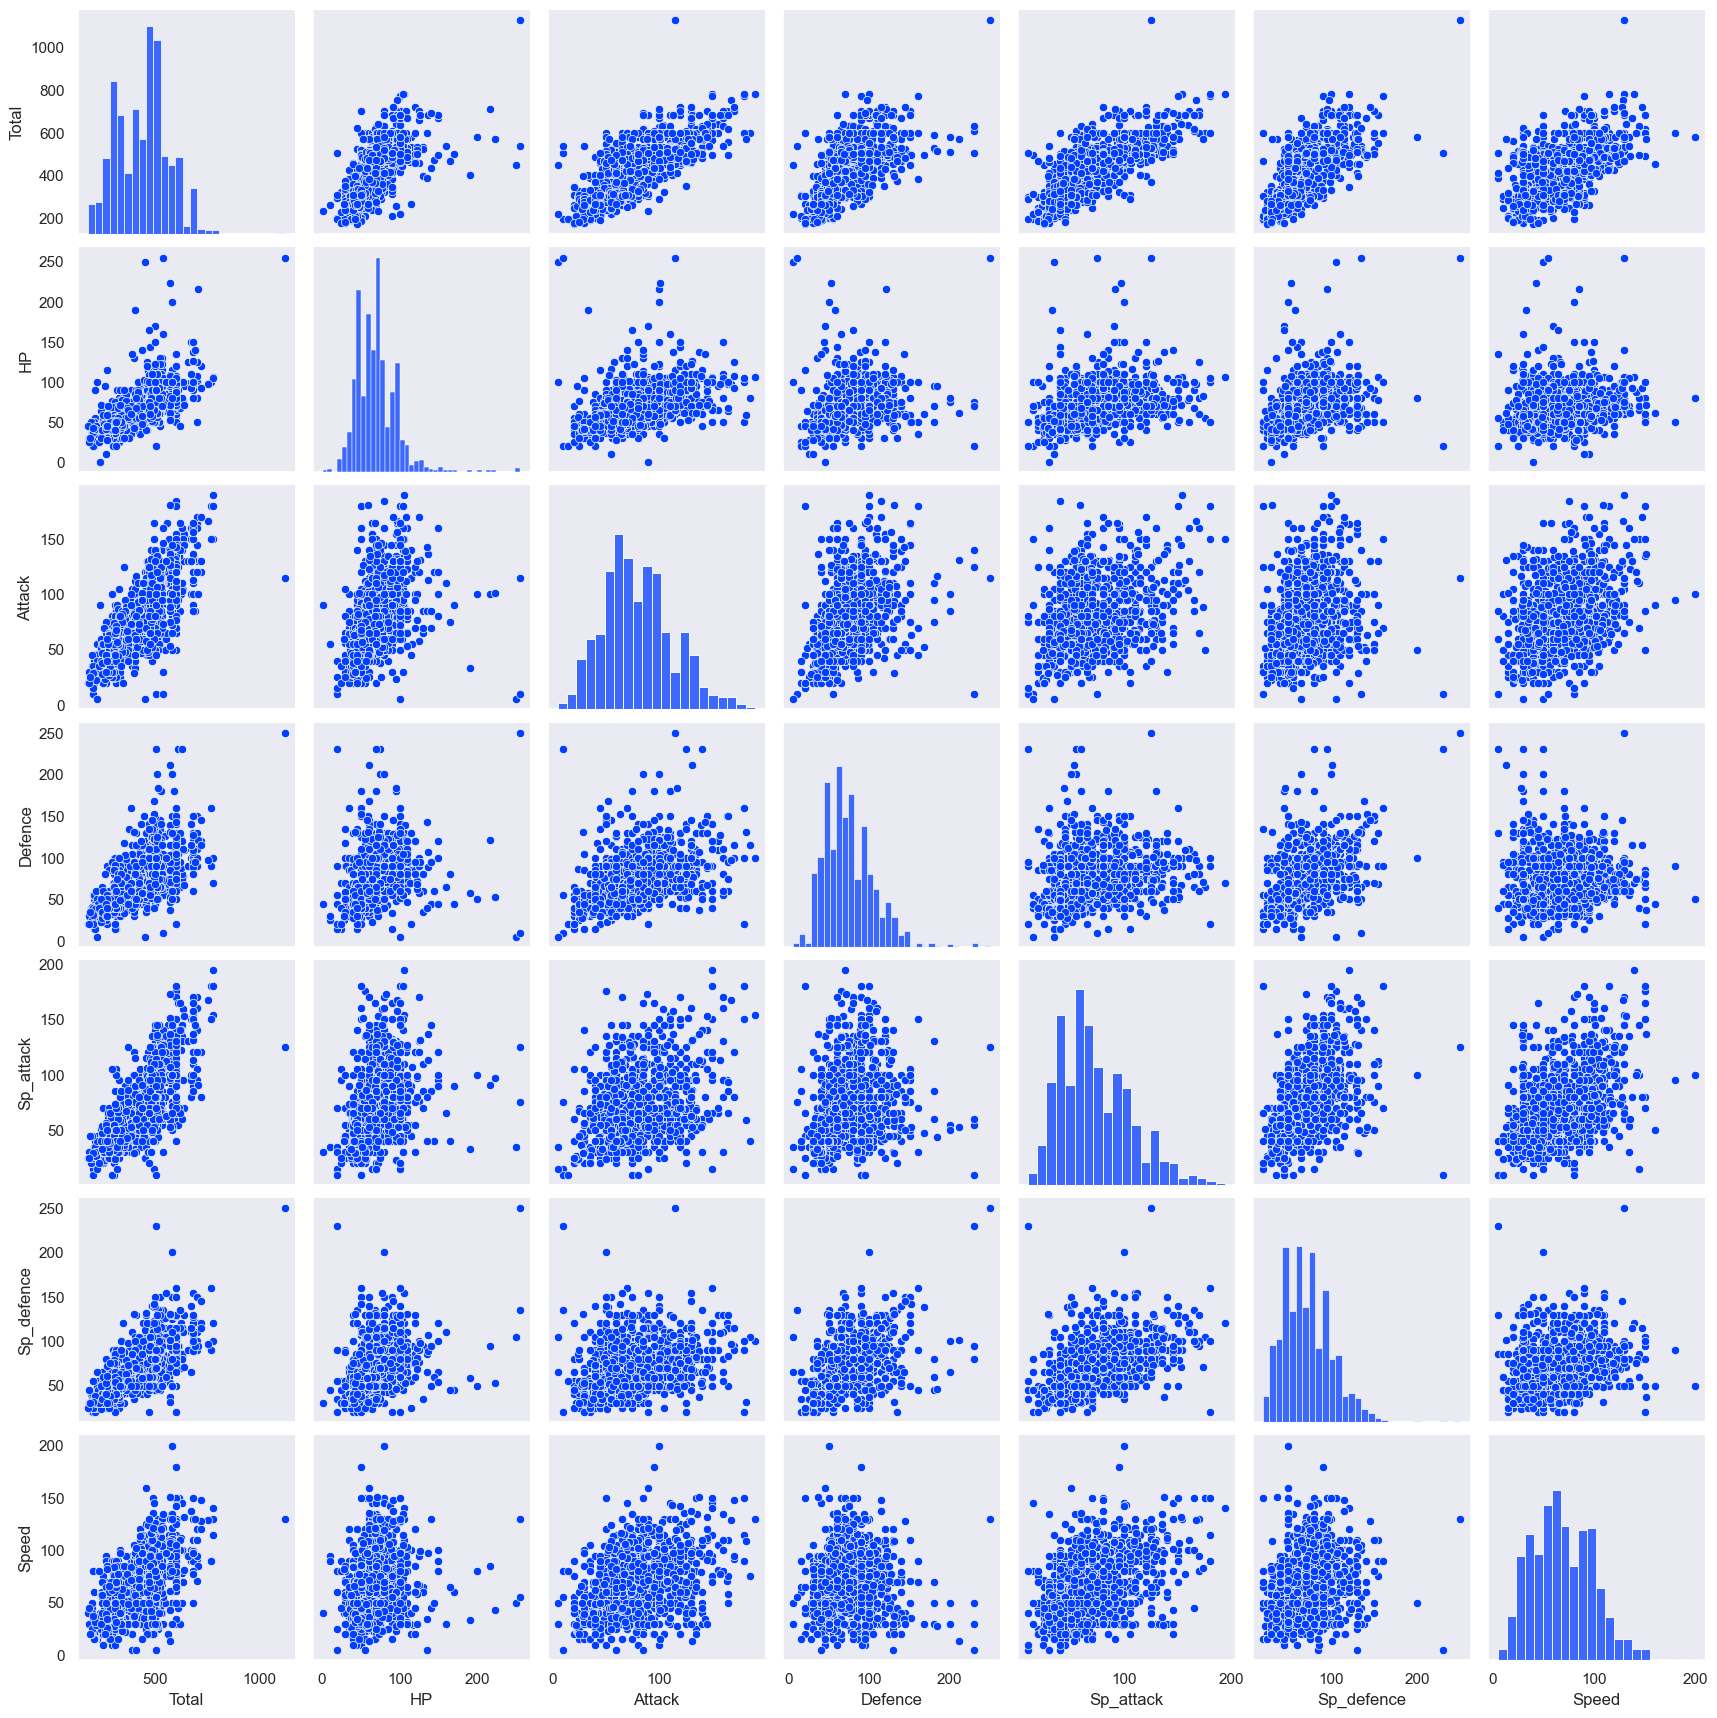

In [53]:
sns.set(
    style="dark", 
    palette="bright", 
    color_codes=True
)
sns.pairplot(df.dropna())
plt.show()

### d) Анализ полученных результатов
В полученной матрице графиков рассеивания мы можем оценить степень связи между параметрами. Так в нашем случае, по графикам можно увидеть следующее:
1. На графике рассеивания Attack и Total мы можем увидеть что точки рассеивания формируют положительную, линейную структуру, что говорит о сильной связи(корреляции).
2. На графике рассеивания Attack и Defence мы можем увидеть что точки рассеивания формируют положительную, экспоненциальную структуру.
3. На графике рассеивания HP и Speed мы можем увидеть что точки рассеивания формируют горизонтальную прямую линию, что говорит о слабой связи(корреляции).